In [1]:
%load_ext autoreload
%autoreload 2
from fast_rep.rfd_tools  import load_RFD,find_ori_position,smooth,convert_RFD_delta_MRT
from pylab import *
import jax
jax.config.update('jax_enable_x64', True)
jax.config.update("jax_debug_nans", True)
import pickle

In [4]:
jax.config

In [25]:
data={}
modes = ["MAP","Laplace","ADVI"]
for mode in modes:
    with open(f"../../comparison/comp_{mode}-Weibull_True_bayesian-chrI:0-249100.pickle","rb") as f:
        data[mode]=pickle.load(f)

# Comparison ELBO

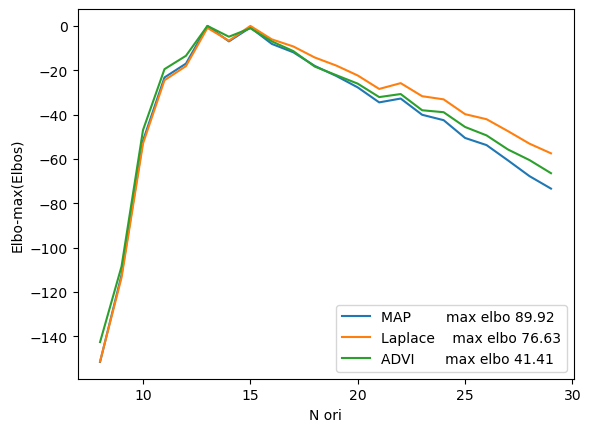

In [27]:
for mode in modes:
    m = max(data[mode]["elbo"])
    #m=0
    plot(data[mode]["number_of_origins"],np.array(data[mode]["elbo"])-m,label=f"{mode:10} max elbo {m:.2f}")
    xlabel("N ori")
    ylabel("Elbo-max(Elbos)")
legend()

# Comparison Parameter and STD

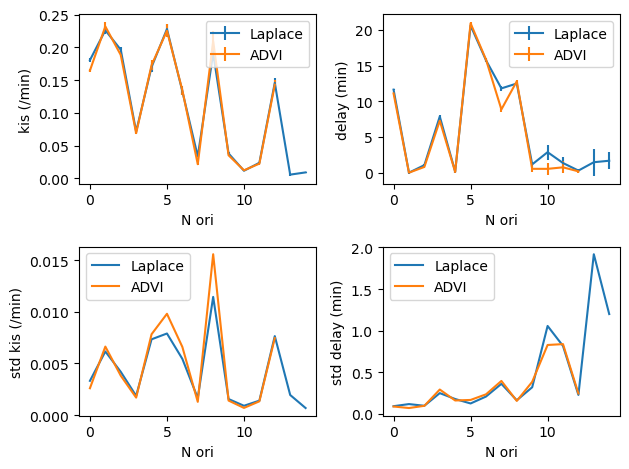

In [18]:
f,axes = subplots(2,2)

for mode in modes[1:]:
    im = np.argmax(data[mode]["elbo"])
   
    params = data[mode]["detail_results"][im]["params"]
    ori = range(len(params["kis"]))
    axes[0,0].errorbar(x=ori,y=params["kis"],yerr=params["kis_std"],label=mode)
    axes[0,0].legend()
    axes[0,0].set_ylabel("kis (/min)")
    axes[0,0].set_xlabel("N ori")
    
    
    axes[0,1].errorbar(x=ori,y=params["extra_t"],yerr=params["extra_t_std"],label=mode)
    axes[0,1].set_ylabel("delay (min)")
    axes[0,1].set_xlabel("N ori")
    axes[0,1].legend()

    axes[1,0].plot(ori,params["kis_std"],label=mode)
    axes[1,0].set_ylabel("std kis (/min)")
    axes[1,0].set_xlabel("N ori")
    axes[1,0].legend()

    axes[1,1].plot(ori,params["extra_t_std"],label=mode)
    axes[1,1].set_ylabel("std delay (min)")
    axes[1,1].set_xlabel("N ori")
    axes[1,1].legend()

f.tight_layout()
    
    #plot(data[mode]["number_of_origins"],np.array(data[mode]["elbo"])-m,label=f"{mode:10} max elbo {m:.2f}")

In [22]:
data={}
modes = ["MAP","Laplace","ADVI"]
for mode in modes:
    data[mode]={}

    for model in ["Weibull","Exponential"]:
        data[mode][model]={}
        for fit_time in ["True","False"]:
            name = f"../../comparison/comp_{mode}-{model}_{fit_time}_bayesian-chrI:0-249100.pickle"
            print(name)
            with open(name,"rb") as f:
                data[mode][model][fit_time] =pickle.load(f)

../../comparison/comp_MAP-Weibull_True_bayesian-chrI:0-249100.pickle
../../comparison/comp_MAP-Weibull_False_bayesian-chrI:0-249100.pickle
../../comparison/comp_MAP-Exponential_True_bayesian-chrI:0-249100.pickle
../../comparison/comp_MAP-Exponential_False_bayesian-chrI:0-249100.pickle
../../comparison/comp_Laplace-Weibull_True_bayesian-chrI:0-249100.pickle
../../comparison/comp_Laplace-Weibull_False_bayesian-chrI:0-249100.pickle
../../comparison/comp_Laplace-Exponential_True_bayesian-chrI:0-249100.pickle
../../comparison/comp_Laplace-Exponential_False_bayesian-chrI:0-249100.pickle
../../comparison/comp_ADVI-Weibull_True_bayesian-chrI:0-249100.pickle
../../comparison/comp_ADVI-Weibull_False_bayesian-chrI:0-249100.pickle
../../comparison/comp_ADVI-Exponential_True_bayesian-chrI:0-249100.pickle
../../comparison/comp_ADVI-Exponential_False_bayesian-chrI:0-249100.pickle


# Model comparison for the three modes:

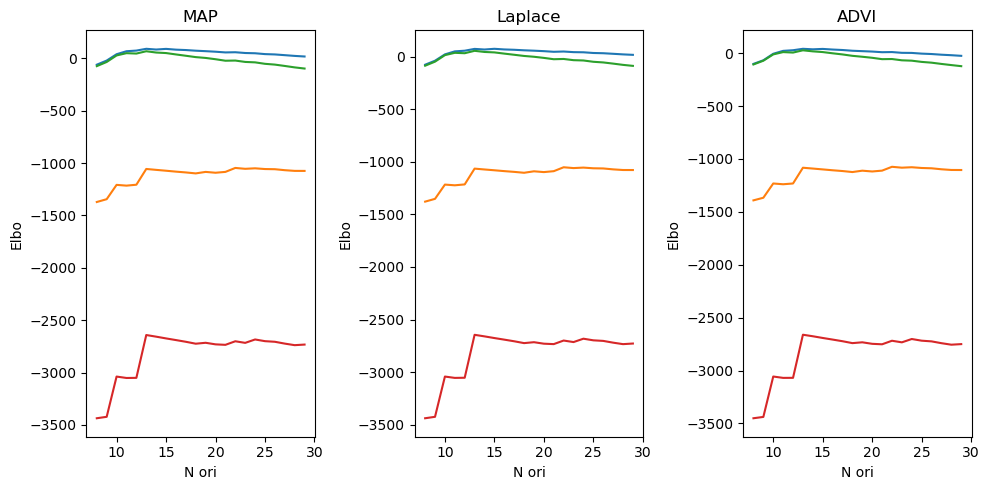

In [23]:
f,ax=subplots(1,3,figsize=(10,5))
for i,mode in enumerate(modes):
    for model in ["Weibull","Exponential"][:]:
        for fit_time in ["True","False"][:]:
            ax[i].set_title(mode)
            n_o = data[mode][model][fit_time]["number_of_origins"]
            elbo  =data[mode][model][fit_time]["elbo"]
            ax[i].plot(n_o,elbo,label=f"{model} {fit_time}")
            ax[i].set_xlabel("N ori")
            ax[i].set_ylabel("Elbo")


f.tight_layout()